# CIFAR10 Data with Keras
### Convolutional Neural Networks

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from keras.datasets import cifar10

2025-02-05 13:37:54.040770: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-02-05 13:37:54.821935: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
X_train.shape

y_train.shape

(50000, 1)

In [4]:
X_test.shape

y_test.shape

(10000, 1)

### Visualize Data

[3]


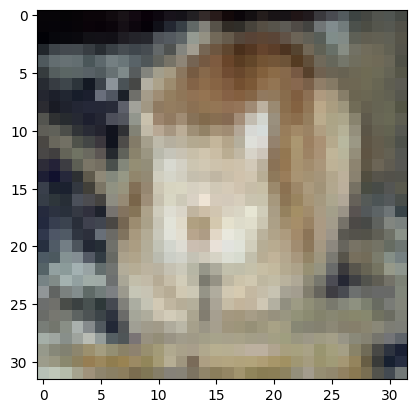

In [5]:
idx = 33
plt.imshow(X_train[idx])
print(y_train[idx])

# X_train[idx].shape

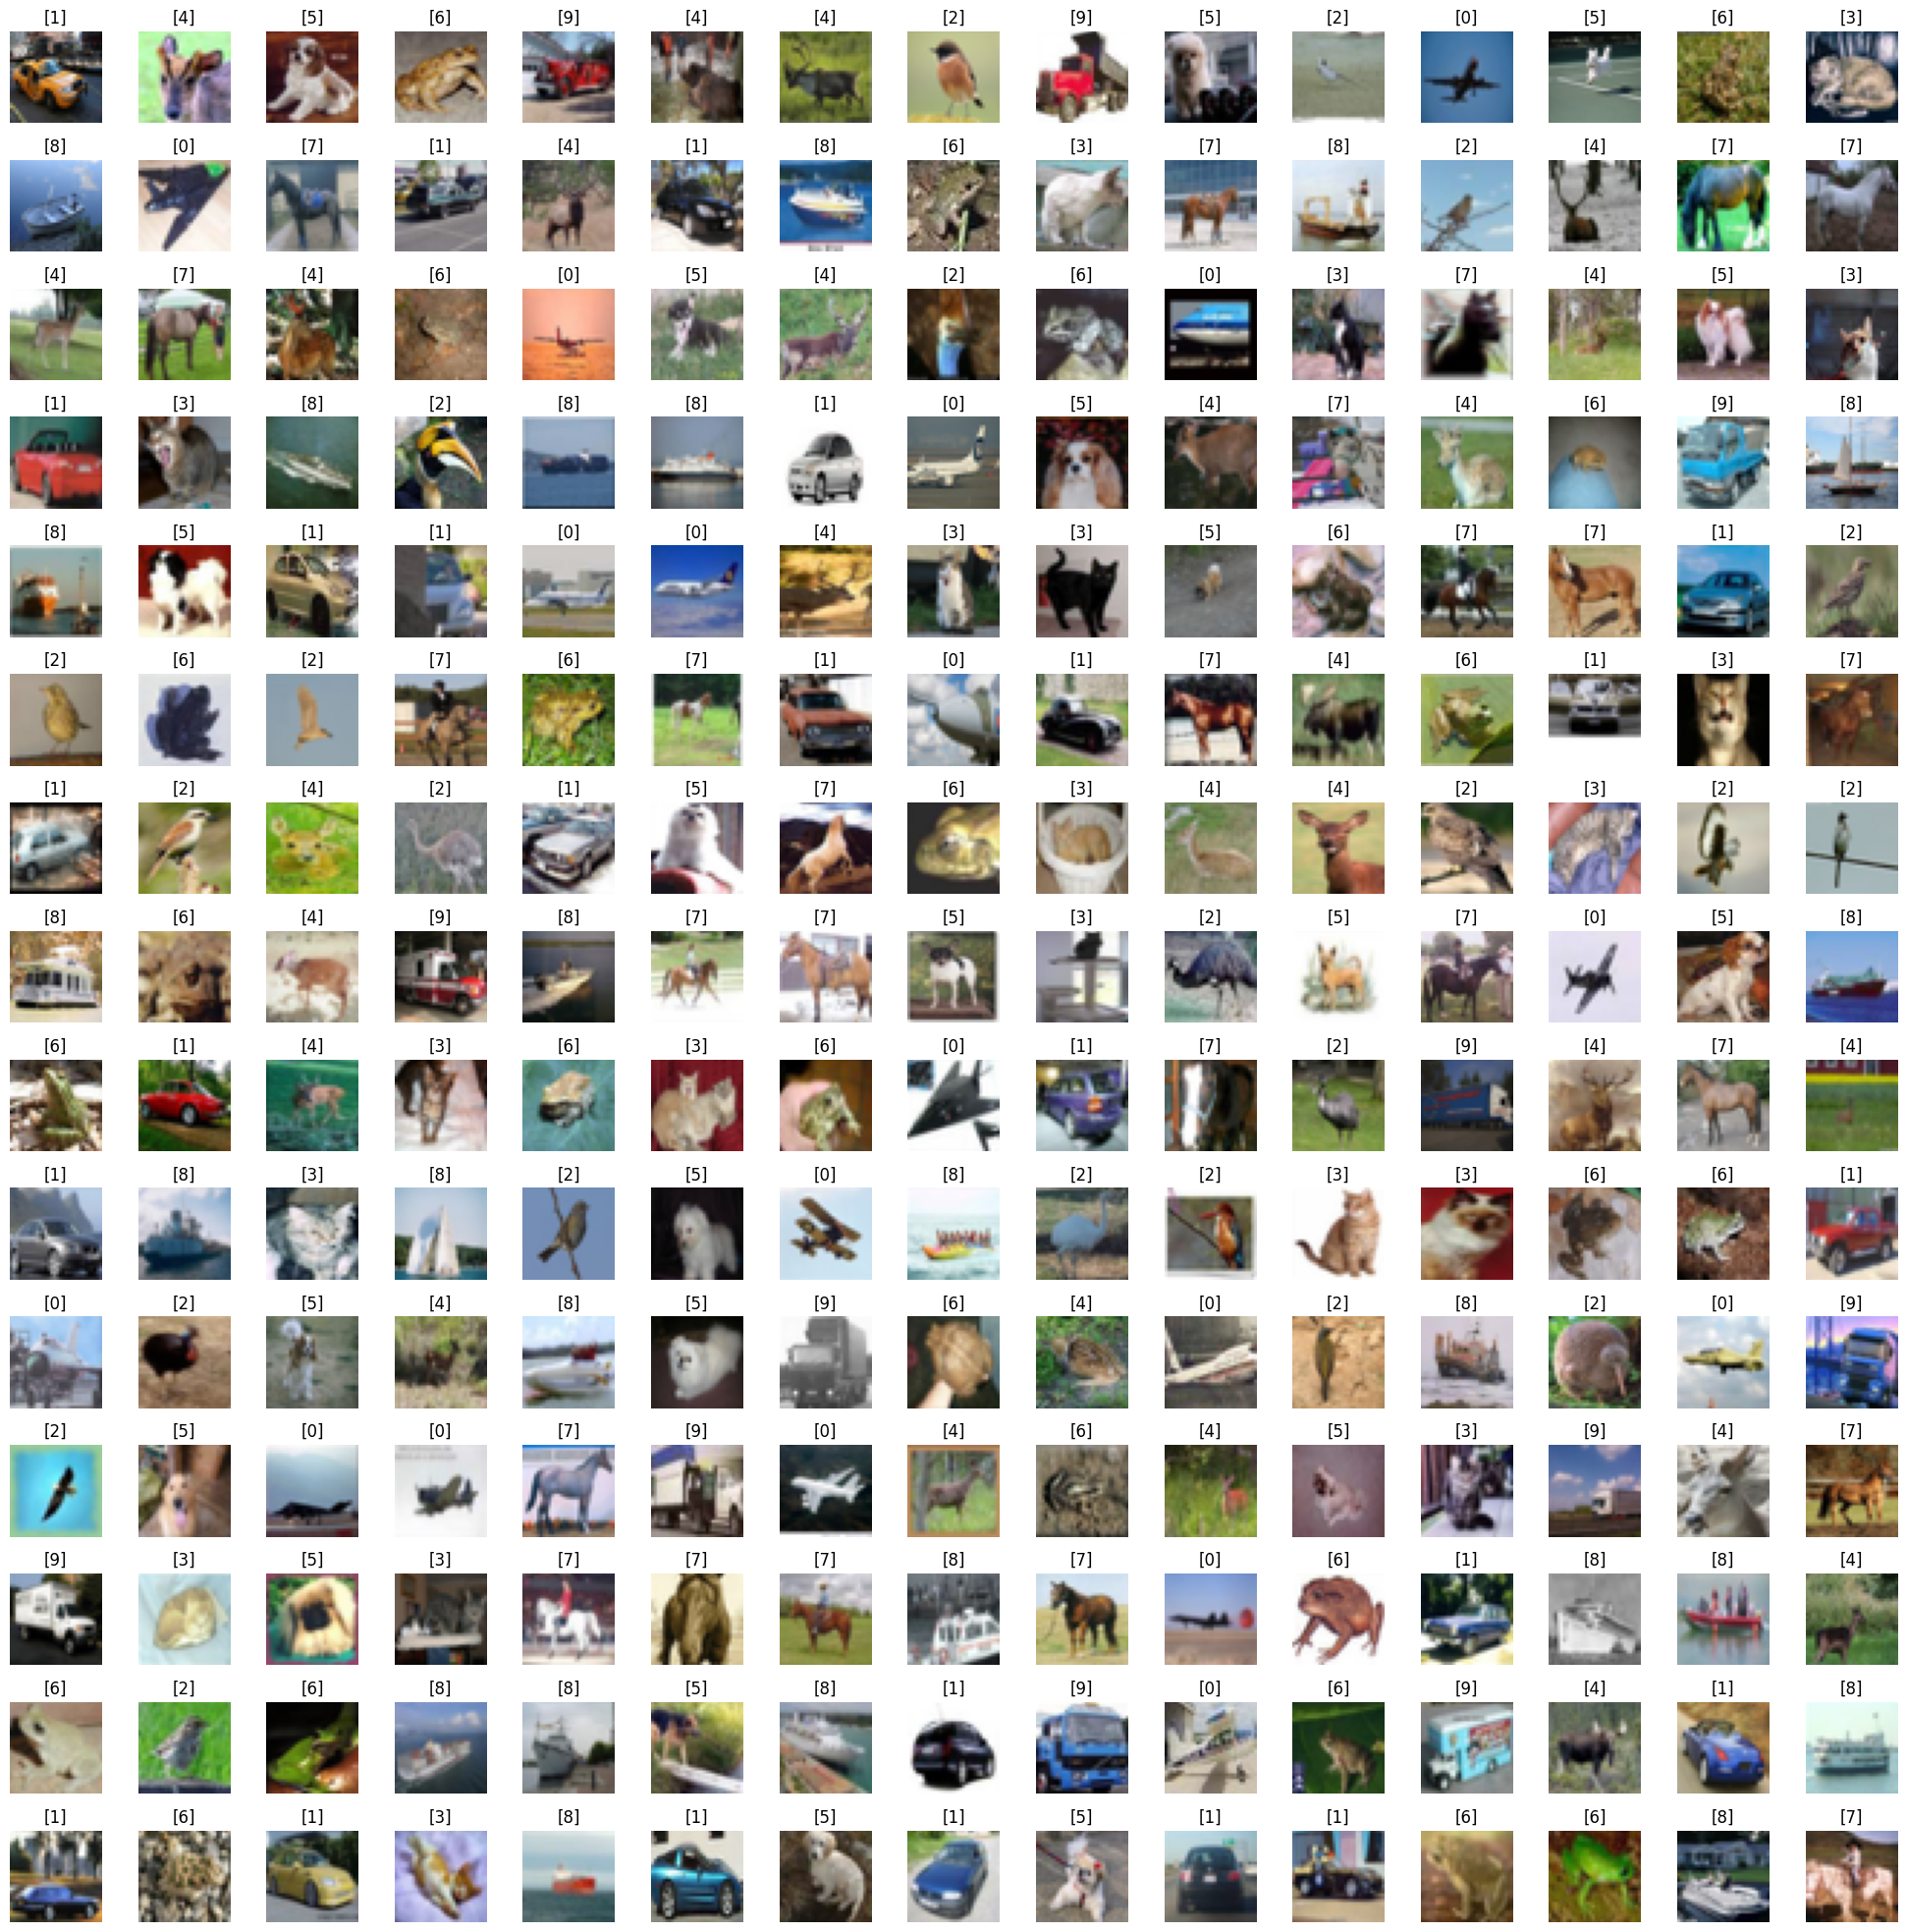

In [6]:
grid_width = 15
grid_len = 15

fig, axes = plt.subplots(grid_len, grid_width, figsize = (25, 25))
axes = axes.ravel()

n_training = len(X_train)

for img in np.arange(0, grid_len * grid_width):
    index = np.random.randint(0, n_training) #pick random num
    axes[img].imshow(X_train[index])
    axes[img].set_title(y_train[index])
    axes[img].axis('off')

plt.subplots_adjust(hspace = 0.4)

### Data Prep

In [7]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [8]:
num_categories = 10

In [9]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [10]:
import keras
y_train = keras.utils.to_categorical(y_train, num_categories) # convert numbers into binary

In [11]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [12]:
y_test = keras.utils.to_categorical(y_test, num_categories) # convert numbers into binary

In [13]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [14]:
X_train = X_train/255
X_test = X_test/255

In [15]:
X_test.shape

(10000, 32, 32, 3)

In [16]:
y_test.shape

(10000, 10)

In [17]:
X_train[0].shape

(32, 32, 3)

In [18]:
Input_shape = X_train.shape[1:]
Input_shape

(32, 32, 3)

### Training the model

In [19]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [20]:
## network layer creation 

model_0 = Sequential()
model_0.add(keras.Input(shape=Input_shape)) # define shape FIRST 
model_0.add(Conv2D(filters=32, 
                   kernel_size=(3,3), 
                   activation='relu'))

model_0.add(Conv2D(filters=32,
                   kernel_size=(3,3),
                   activation = 'relu'))
model_0.add(MaxPooling2D(2,2))
model_0.add(Dropout(0.3))



model_0.add(Conv2D(filters=64, 
                   kernel_size=(3,3), 
                   activation='relu'))

model_0.add(Conv2D(filters=64,
                   kernel_size=(3,3),
                   activation = 'relu'))
model_0.add(MaxPooling2D(2,2))
model_0.add(Dropout(0.2))


## flatten
model_0.add(Flatten())
model_0.add(Dense(units = 1024, activation = 'relu'))
model_0.add(Dense(units = 1024, activation = 'relu')) ## hidden layers

model_0.add(Dense(units = 10, # num of classes
                  activation = 'softmax')) 

2025-02-05 13:38:02.609782: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:282] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2025-02-05 13:38:02.609820: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:134] retrieving CUDA diagnostic information for host: owner-pad
2025-02-05 13:38:02.609843: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:141] hostname: owner-pad
2025-02-05 13:38:02.610054: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:165] libcuda reported version is: 535.183.1
2025-02-05 13:38:02.610093: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:169] kernel reported version is: 535.183.1
2025-02-05 13:38:02.610098: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:248] kernel version seems to match DSO: 535.183.1


In [21]:
model_0.compile(loss = 'categorical_crossentropy',
                optimizer = Adam(learning_rate=0.001),
                metrics = ['accuracy'])


In [22]:
# perform training (store in hist*)


model_0.fit(X_train, y_train, batch_size= 32, epochs = 20, shuffle = True)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 44ms/step - accuracy: 0.3364 - loss: 1.7695
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 59s 38ms/step - accuracy: 0.5786 - loss: 1.1786
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 59s 38ms/step - accuracy: 0.6541 - loss: 0.9792
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 59s 38ms/step - accuracy: 0.6984 - loss: 0.8501
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 59s 38ms/step - accuracy: 0.7331 - loss: 0.7479
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 60s 39ms/step - accuracy: 0.7590 - loss: 0.6786
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 36ms/step - accuracy: 0.7809 - loss: 0.6148
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 55s 35ms/step - accuracy: 0.8011 - loss: 0.5528
Epoch 9/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 36ms/step - accuracy: 0.8246 - loss: 0.4956
Epoch 10/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 60s 39ms/step - accuracy: 0.8389 - loss: 0.4543
Epoch 11/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 60s 39ms/step - accuracy: 0.8493 - loss: 0.4142
Epoch 12

### Model Evaluation

In [23]:
score = model_0.evaluate(X_test, y_test)
print(f"Accuracy: {score[1]}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7326 - loss: 1.1099
Accuracy: 0.7357000112533569


In [24]:
pred_class = np.argmax(model_0.predict(X_test), axis=1) # ensure values are class labels and not probabilities

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [25]:
y_test = y_test.argmax(1) # revert y_test values 
y_test.shape

(10000,)

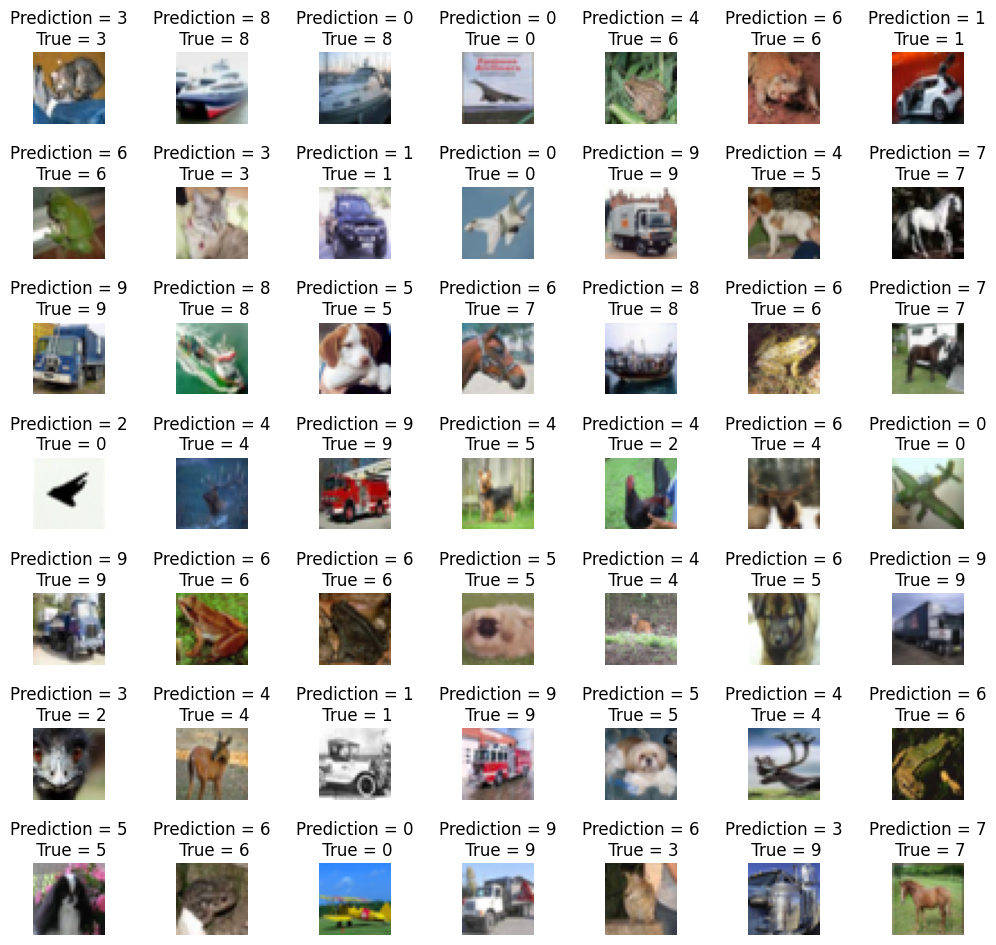

In [26]:
matrix_len = 7
matrix_wid = 7
fig, axes = plt.subplots(matrix_len, matrix_wid, figsize = (12, 12))
axes = axes.ravel()

for idx in np.arange(0, matrix_len*matrix_wid):
    axes[idx].imshow(X_test[idx])
    axes[idx].set_title(f'Prediction = {pred_class[idx]:}\n True = {y_test[idx]}')
    axes[idx].axis('off')
plt.subplots_adjust(wspace=1)

<Axes: >

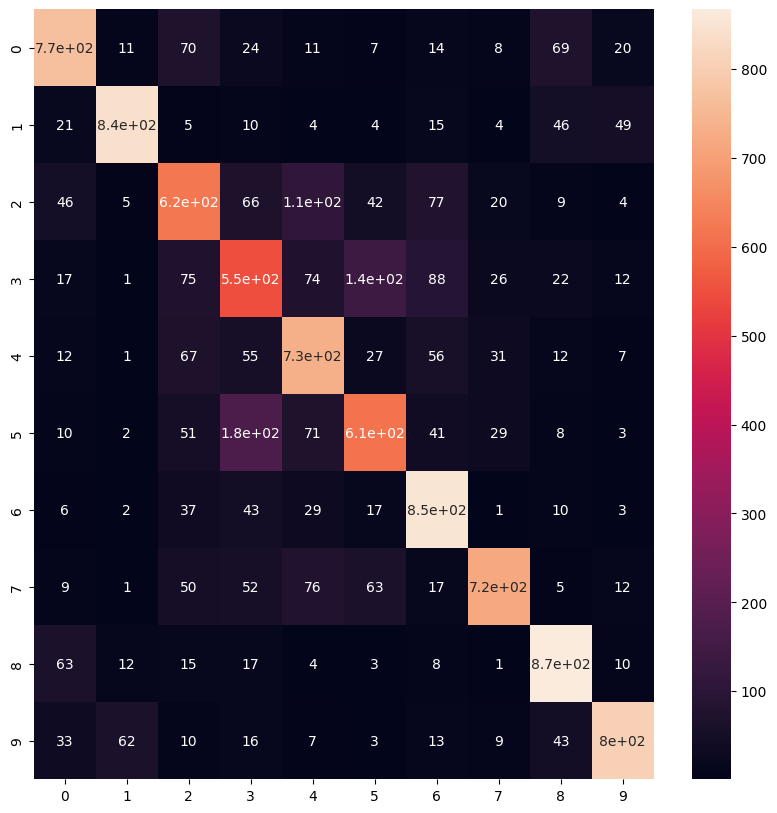

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

con_mat = confusion_matrix(y_test, pred_class)
con_mat
plt.figure(figsize = (10,10))
sns.heatmap(con_mat, annot=True)

### Save Model Locally

In [28]:
import os
dir = os.path.join(os.getcwd(), 'cnn_models')

if not os.path.isdir(dir):
    os.makedirs(dir)
model_path = os.path.join(dir, 'keras_cifar10_model.keras')
model_0.save(model_path)

# Data Augmentation

## Retraining with Augmented Data

In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
data_gen = ImageDataGenerator(rotation_range = 90,
                              width_shift_range = .1,
                             height_shift_range = 0.2,
                             vertical_flip=True)

In [30]:
data_gen.fit(X_train)

#### Training

In [34]:
model_0.fit(
    data_gen.flow(X_train, y_train, batch_size=32), 
    epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 67s 43ms/step - accuracy: 0.5231 - loss: 1.3425
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 44ms/step - accuracy: 0.5255 - loss: 1.3317
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 40ms/step - accuracy: 0.5336 - loss: 1.3141
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 47ms/step - accuracy: 0.5341 - loss: 1.3075
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 71s 45ms/step - accuracy: 0.5348 - loss: 1.3064
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 71s 45ms/step - accuracy: 0.5458 - loss: 1.2831
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.5421 - loss: 1.2869
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 67s 43ms/step - accuracy: 0.5448 - loss: 1.2881
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 72s 46ms/step - accuracy: 0.5550 - loss: 1.2550
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.5574 - loss: 1.2507


In [36]:
from tensorflow.keras.utils import to_categorical

# Convert y_test to one-hot encoding
y_test = to_categorical(y_test, num_classes=10)

score = model_0.evaluate(X_test, y_test)
print(f"Accuracy: {score[1]}")

ValueError: Cannot take the length of shape with unknown rank.

In [38]:
import os
dir = os.path.join(os.getcwd(), 'cnn_models')

if not os.path.isdir(dir):
    os.makedirs(dir)
model_path = os.path.join(dir, 'keras_cifar10_model_augmented.keras')
model_0.save(model_path)